In [2]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [7]:
def event_func(path):
    file_list = glob.glob((path+'/*_eventCounts.txt'))
    events_frame = pd.DataFrame({'S':[], 'SL':[], 'D':[], 'T':[], 'TL':[], 'L':[], 'Leaf':[], 'Name':[]})
    for file_name in file_list:
        events_frame_og = pd.read_table(file_name, sep=':', header=None, index_col=0).transpose()
        name = os.path.basename(file_name); name = name.split('_')[0]
        events_frame_og['Name'] = [name]
        events_frame = events_frame.append(events_frame_og)
    events_frame.reset_index(drop=True, inplace=True)
    events_frame['AT'] = events_frame['T'] + events_frame['TL']
    return events_frame

In [124]:
events_frame = event_func("Results/geneRaxResults/reconciliations")

In [142]:
ortho = pd.read_table('Results/Orthogroups.GeneCount.tsv', sep = '\t')

In [156]:
bool(0)

False

In [167]:
ortho_bool = ortho.iloc[:, 1:-1].astype(bool).astype(int)
ortho_bool['Orthogroup'] = ortho['Orthogroup']

In [168]:
ortho_bool

,GCF_000008525.1_ASM852v1_genomic,GCF_000008785.1_ASM878v1_genomic,GCF_000011725.1_ASM1172v1_genomic,GCF_000013245.1_ASM1324v1_genomic,GCF_000020245.1_ASM2024v1_genomic,GCF_000021165.1_ASM2116v1_genomic,GCF_000021465.1_ASM2146v1_genomic,GCF_000023805.1_ASM2380v1_genomic,GCF_000091345.1_ASM9134v1_genomic,GCF_000148665.1_ASM14866v1_genomic,...,GCF_013177275.1_ASM1317727v1_genomic,GCF_900119995.1_HE143_09_genomic,GCF_900120055.1_HE178_09_genomic,GCF_900120225.1_HE136_09_genomic,GCF_900120255.1_HE101_09_genomic,GCF_900120275.1_HE142_09_genomic,GCF_900120335.1_HE147_09_genomic,GCF_900176185.1_HE93_10_genomic,GCF_900478295.1_35377_D02_genomic,Orthogroup
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,OG0000000
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,OG0000001
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,OG0000002
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,OG0000003
4,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,OG0000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,OG0002006
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,OG0002007
2008,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,OG0002008
2009,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,OG0002009


# See recombinations

In [86]:
reads = pd.read_table('recombinations/J99.bed', sep = '\t', header = None)

In [87]:
reads = reads.iloc[:, [1,2]]
reads = reads.rename({1: 'start', 2: 'end'}, axis='columns')

#add 1 to values because they are written from 0 in the bed file
reads.loc[:, 'start'] = reads['start'].apply(lambda x: x+1)
reads.loc[:, 'end'] = reads['end'].apply(lambda x: x+1)

In [88]:
depth_frame = pd.read_table('recombinations/depthJ99.tsv', sep = '\t', header = None)
depth_frame = depth_frame.rename({0: 'gene', 1: 'coordinate', 2: 'depth'}, axis='columns')

In [99]:
window = 20000
step = 5000

In [100]:
score_frame = pd.DataFrame({'start':[], 'end':[], 'number':[], 'depth':[],'score':[]})
start = 1
end = start + window
max_end = reads.iloc[-1, 1]
while end <= max_end:
    number = reads[(reads['start'] > start) & (reads['start'] <= end)].shape[0] + reads[(reads['end'] > start) & (reads['end'] <= end)].shape[0]
    depth = depth_frame[(depth_frame.coordinate > start) & (depth_frame.coordinate <= end)]['depth'].mean()
    score = number/depth
    add_frame = pd.DataFrame({'start': [start], 'end':[end], 'number':[number], 'depth':[depth], 'score':[score]})
    score_frame = score_frame.append(add_frame, ignore_index=True)
    start = start + step
    end = end + step

In [91]:
comp = pd.read_table('Results/gcb_res/GCF_013177275.1_ASM1317727v1_genomic/window_complexity_contig_NZ_JABFHN010000001...txt', sep='\t')
comp['start'] = comp.position.apply(lambda x : x.split(':')[0])
comp['start'] = comp['start'].astype(float)
comp['complexity'] = comp['complexity'].astype(float)
comp = comp.sort_values('start')

<AxesSubplot:xlabel='start', ylabel='complexity'>

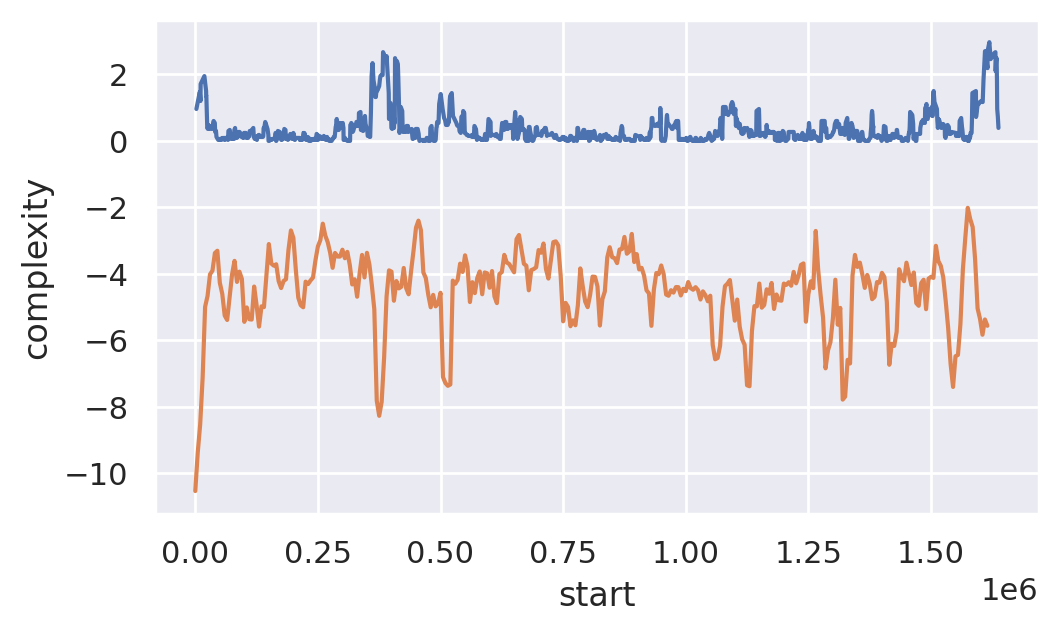

In [103]:
sns.lineplot(x = comp.start, y = comp.complexity * 1.2)
sns.lineplot(x = score_frame.start, y = -score_frame.score + 15)

<AxesSubplot:xlabel='start', ylabel='depth'>

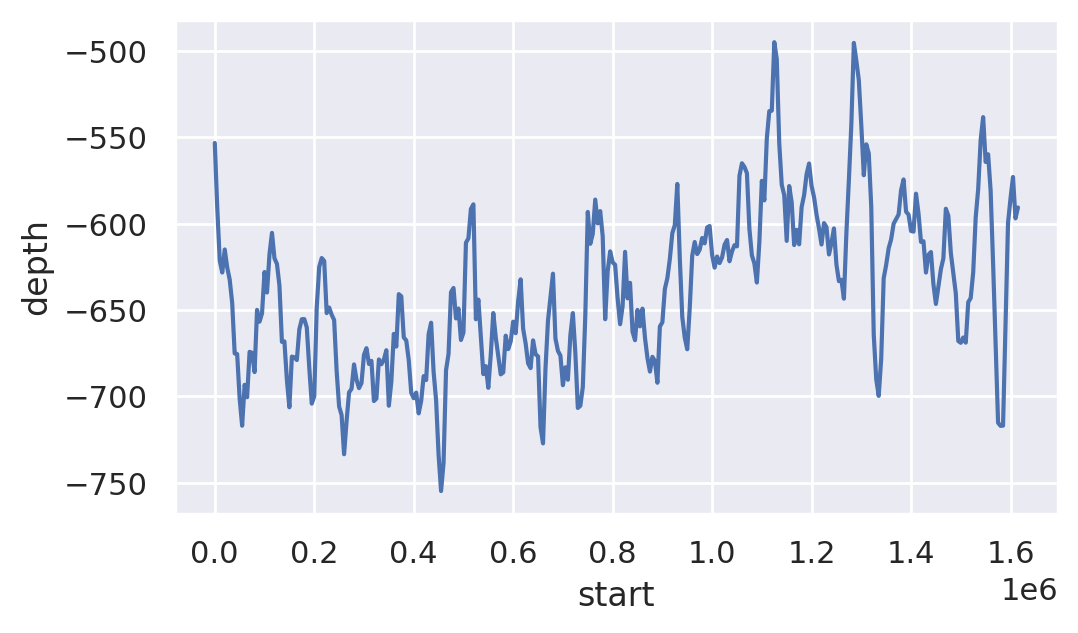

In [104]:
sns.lineplot(x = score_frame.start, y = -score_frame.depth)